In [1]:
import pandas as pd      #dataframes
import numpy as np

import matplotlib.pyplot as plt      # ploting
from mpl_toolkits.mplot3d import Axes3D 

from sklearn.datasets import load_iris        # data

from sklearn.decomposition import PCA             # to convert the values
from sklearn.preprocessing import StandardScaler


In [2]:
iris = load_iris()

In [3]:
# create a dataframe from the data

df = pd.DataFrame(iris['data'], columns= iris['feature_names'])

In [4]:
scaler = StandardScaler()

scaler.fit(df)   
scaled_df = scaler.transform(df)  # transform is what finishes the fit...

In [5]:
pca = PCA(n_components=3) # 3 values for 3d

pca.fit(scaled_df)
plot_data = pca.transform(scaled_df)

plot_data.shape

(150, 3)

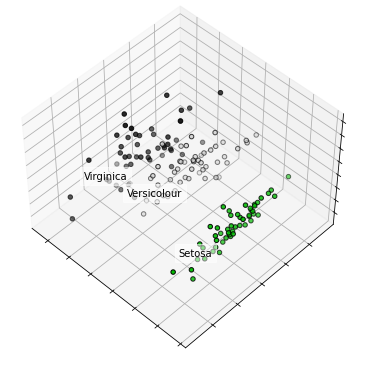

In [14]:
fig = plt.figure(1, figsize=(5,5))

# elev: elevation angle, azim: azimutal viewing angle
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134) 

X = plot_data
tar = iris.target

for species, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[tar == label, 0].mean(),
              X[tar == label, 1].mean() + 1.5,
              X[tar == label, 2].mean(), species,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results

tar = np.choose(tar, [1, 2, 0]).astype(np.float) # convert to float

# the actual plotting of points...
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=tar,
           cmap=plt.cm.nipy_spectral, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([]); # removing the labels...